In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

### 1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [29]:
def calc_logloss(y, y_pred):
    
    a = .000001
    new_y_pred = np.empty_like(y_pred)
    for i, val in enumerate(y_pred):
            
        if y_pred[i] == 0:
            new_y = y[i] * np.log(y_pred[i] + a) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
            new_y_pred[i] = new_y
        elif y_pred[i] == 1:
            new_y = y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - (y_pred[i] - a))
            new_y_pred[i] = new_y
        else:
            new_y = y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
            new_y_pred[i] = new_y
    
    err = - np.mean(new_y_pred)
    return err

In [30]:
y1 = np.array([1, 0])
y_pred1 = np.array([.8, 0])
calc_logloss(y1, y_pred1)

0.11157177565710485

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [75]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [80]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W, err

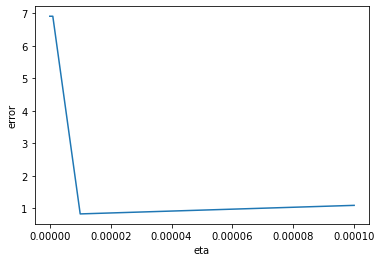

In [81]:
eta = np.logspace(-8, -4, 5)
errors = []
w_list = []
for i in eta:
    W, err = eval_model(X, y, 1000, i)
    errors.append(err)
    w_list.append(W)
plt.plot(eta, errors)
plt.xlabel('eta')
plt.ylabel('error')
plt.show()

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [84]:
def calc_pred_proba(W, X):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [108]:
W = w_list[errors.index(min(errors))]
y_pred = calc_pred_proba(W, X)
print(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

[0.45666731 0.27021679 0.54528093 0.23977948 0.05571984 0.22082931
 0.14215525 0.01035682 0.50779246 0.30088775]


### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [109]:
def calc_pred(W, X, y):
    z = y * np.dot(X, W)
    y_pred = sigmoid(z)
    return y_pred

In [110]:
calc_pred(W, X, y)

array([0.5       , 0.5       , 0.54528093, 0.5       , 0.05571984,
       0.5       , 0.14215525, 0.5       , 0.50779246, 0.30088775])

### 5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [111]:
def accuracy(y, y_pred):
    acc = 1/len(y) * np.sum(y == y_pred)
    return acc

In [112]:
def count_preds(y, y_pred):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(y_pred)):
        if y[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y[i] == 1 and y_pred[i] == 1:
            tp += 1
    return tp, fp, fn

In [113]:
def precision(tp, fp):
    try:
        return tp/(tp + fp)
    except ZeroDivisionError:
        return 'На нуль делить нельзя'

In [114]:
def recall(tp, fn):
    try:
        return tp/(tp + fn)
    except ZeroDivisionError:
        return 'На нуль делить нельзя'

In [115]:
tp, fp, fn = count_preds(y, y_pred)

precision(tp, fp)
recall(tp, fn)

0.4

### 6. Могла ли модель переобучиться? Почему?

Вполне могла. Из-за дисбаланса классов